# Thinning

Se utiliza para "afinar" la región foreground tal que se preserven su extensión (preservar los puntos terminales que caracterizan la estructura) y conectividad( preservar conexiones 4 u 8-conexas).

Thinning es principalmente utilizado para producir "esqueletos" de imágenes que sirven para describirlas, o para reducir el output de edge-detectors a un pixel de ancho.

La operación de Thinning puede ser implementada mediante una de las siguientes opciones:

- Zhang Suen fast parallel thinning algorithm
- Non-max Suppression in Canny Edge Detector
- Guo and Hall's two sub-iteration parallel thinning algorithm
- Algoritmos iterativos que utilizan operaciones morfológicas (como por ejemplo, hit-or-miss, opening y erosion)

Vamos a ver algoritmos iterativos con operaciones de erosion y opening

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

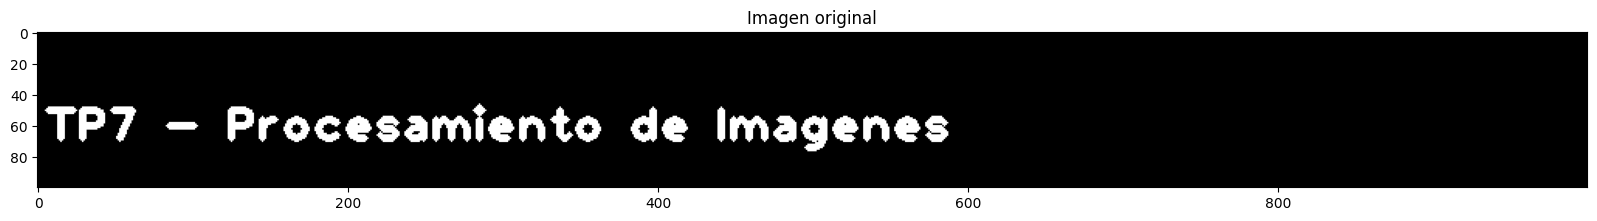

In [6]:
# Creo img de texto
img = np.zeros((100, 1000), dtype='uint8')
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(img, 'TP7 - Procesamiento de Imagenes', (5,70), font, 2, (255), 3, cv2.LINE_4)
img_aux = img.copy()

fig = plt.figure(figsize=(20, 20))
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.show()

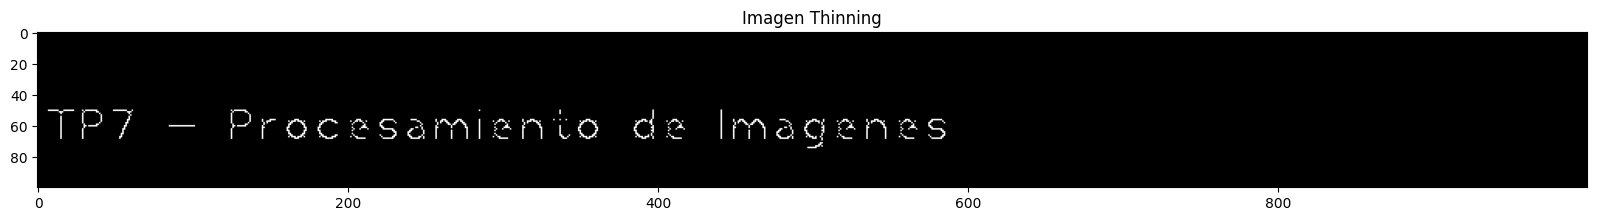

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
thin = np.zeros(img.shape, dtype='uint8')

# Thinning
while (cv2.countNonZero(img_aux) != 0):
    # Erosion
    erode = cv2.erode(img_aux, kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, kernel)
    # Substract
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset, thin)
    # Set the eroded image for next iteration
    img_aux = erode.copy()

fig = plt.figure(figsize=(20, 20))
plt.imshow(thin, cmap='gray')
plt.title('Imagen Thinning')
plt.show()

# Thickening

Thickening es un complemento de Thinning, que se puede lograr mediante aplicar Thinning al fondo de una imagen (o a su complemento).

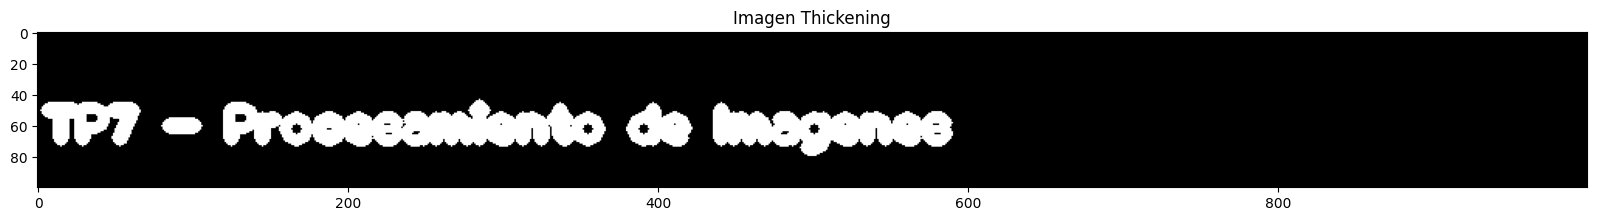

In [9]:
thick = img.copy()
cnts = cv2.findContours(thick, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    cv2.drawContours(thick, [c], -1, (255, 255, 255), thickness=6)

fig = plt.figure(figsize=(20, 20))
plt.imshow(thick, cmap='gray')
plt.title('Imagen Thickening')
plt.show()

# Top-Hat Transform

La transformación Top-Hat es la diferencia entre la imagen original y la operación de apertura. 
Nos muestra qué pixeles blancos fueron removidos por la operación de apertura, como se muestra en la comparación.

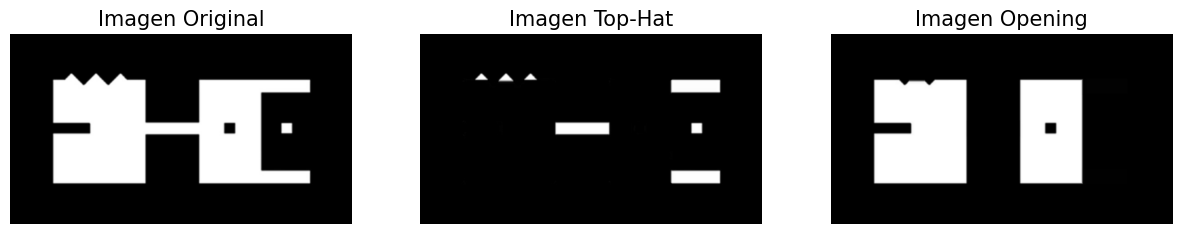

In [12]:
img = cv2.imread('./assets/ex5.jpg')

kernel = np.ones((35, 35), dtype=np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Plots
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax00 = ax[0]
ax01 = ax[1]
ax02 = ax[2]

ax00.set_title('Imagen Original', fontsize=15)
ax00.axis('off')
ax00.imshow(img, cmap='gray')


ax01.set_title('Imagen Top-Hat', fontsize=15)
ax01.axis('off')
ax01.imshow(tophat, cmap='gray')

ax02.set_title('Imagen Opening', fontsize=15)
ax02.axis('off')
ax02.imshow(opening, cmap='gray')
plt.show()

# Hit and Miss